# Pregunta 1
---
### Cuando ejecuta run en simulink , indique que grafica se ve en el scope
![ejercicio1-1.png](./images/ejercicio1-1.png)

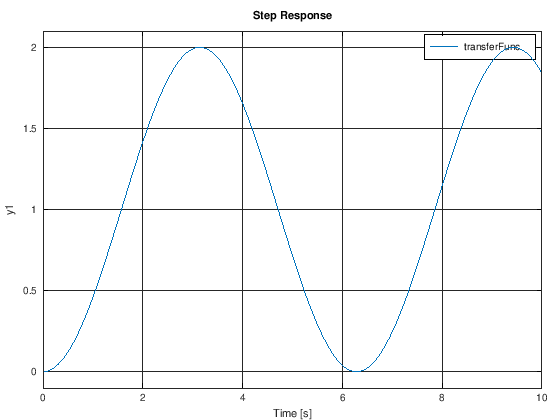

In [12]:
pkg load control
s = tf('s');
% Función transferencia
transferFunc = 1/(s^2+1);
% Gráfica de respuesta al escalón
step (transferFunc)


La respuesta correcta es la C.

# Pregunta 2
---
### Un circuito R L serie , ambos unitarios , es excitado por un escalón de tensión unitario. Se sabe que en 0+ la corriente es yo. El modelo eléctrico es descripto por la ecuación diferencial mostrada donde y(t) es la corriente
$$ \dot{y(t)} + y(t) = 1 (t), \quad \quad  y(0+) = y_0 $$

### Indique que $y(t)$ resuelve la ecuación diferencial:

1. [ ] $y(t) = 1 + (y_0 + 1) \cdot \exp(-t)$
2. [x] $y(t) = 1 + (y_0 - 1) \cdot \exp(-t)$
3. [ ] $y(t) = (y_0 - 1) \cdot \exp(-t)$
4. [ ] $y(t) = (y_0 + 1) \cdot \exp(-t)$

Para resolver este problema se puede aplicar Laplace, despejar $Y(s)$ y luego antitransformar. 
1. Aplico Laplace:
    $$ \mathcal{L} \left\{ \dot{y(t)} + y(t) = 1 (t) \right\}$$
    $$ s \cdot Y(s) - y_0 + Y(s) = \frac{1}{s} $$    

2. Despejo $Y(s)$:
    $$ Y(s) \cdot (s + 1) = \frac{1}{s} + y_0 $$
    $$ Y(s) = \frac{1/s + y_0}{s + 1} $$
    $$ Y(s) = \frac{1}{s^2 + s} + \frac{y_0}{s + 1} $$

3. Antitransformo por residuos:

- Llamo $Y1(s) = \frac{1}{s^2 + s} = \frac{1}{s \cdot (s+1)}$
    $$ \left. Res \, Y1(s) \right|_{s=0} = \lim\limits_{s \to 0} \frac{1 \cdot s}{s \cdot (s+1)} = 1$$
    $$ \left. Res \, Y1(s) \right|_{s=1} = \lim\limits_{s \to -1} \frac{1 \cdot (s+1)}{s \cdot (s+1)} = -1$$
    - Luego la antitransformada es:
    $$ y1(t) = 1 \cdot \exp(0t) + (-)1 \cdot \exp(-1t) = 1 - \exp (-t) $$
- Llamo $Y2(s) = \frac{y_0}{s+1}$:
    - La antitransformada de Y2(s) es:
    $$ y2(t) = y_0 \cdot \exp(-t) $$    

4. Luego el resultado es la suma de y1(t) + y2(t):
    $$ y(t) = 1 - \exp(-t) + y_0 \cdot \exp(-t) = $$
    $$ y(t) = 1 + (y_0 - 1) \cdot \exp(-t) $$

Por lo tanto la respuesta correcta es la opción 2
> _Nota: Luego de escribir todo me di cuenta que podría resolver directamente la ecuación $Y(s) = \frac{1 + y_0 \cdot s}{s \cdot (s+1)}$ por residuos, es más directo._
---
### Abajo una comprobación en Octave.

In [30]:
pkg load symbolic

syms s;
%elijo un valor de y0 al azar
y0 = 33;

Y1 = 1/(s^2+s);
Y2 = y0/(s+1);
Y = Y1 + Y2;
y1 = simplify(ilaplace(Y1))
y2 = simplify(ilaplace(Y2))
y = simplify(ilaplace(Y))

y1 = (sym)

       -t
  1 - ℯ  

y2 = (sym)

      -t
  33⋅ℯ  

y = (sym)

          -t
  1 + 32⋅ℯ  



# Ejercicio 3
---
### Cuando se ejecuta run en simulink, indique que grafica se obseva en el scope:
![ejercicio1-3.png](./images/ejercicio1-3.png)

Este ejercicio es igual que el punto 1. Para resolverlo manual se debe hacer la antitransformada de la función escalón (step) multiplicada por la función transferencia.

Queda así:
    $$ Y(s) = \frac{1}{s \cdot (s^2-2s+2)} = $$

$$ Y(s) = \frac{1}{ s \cdot \left[ \left( s - 1 \right)^2 + 1 \right]} =$$

1. Resuelvo por fracciones simples:
    $$ Y(s) = \frac{1}{ s \cdot \left[ \left( s - 1 \right)^2 + 1 \right]} = \frac{A}{s} + \frac{B}{\left( s - 1 \right)^2 + 1} = $$

- Si A = 

1. Encuentro las raíces del polinomio de 2do orden para resolver por residuos:
> _Recordatorio: Para resolver la cuadrática se utiliza la fórmula $\frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$, donde $a \cdot s^2 + b \cdot s + c = 0$._

2. El resultado es:
    $$ Y(s) = \frac{1}{s \cdot (s-p1) \cdot (s-p2)} \; con \; p1 = 1+i \; p2 = 1-i $$

3. Resuelvo por residuos:
    $$ \left. Res \, Y(s) \right|_{s=0} = \lim\limits_{s \to 0} \frac{1 \cdot s}{s \cdot (s^2-2s+2)} = \frac{1}{2}$$
    $$ \left. Res \, Y(s) \right|_{s=p1} = \lim\limits_{s \to p1} \frac{1 \cdot (s-p1)}{s \cdot (s-p1) \cdot (s-p2))} = $$
    $$ \frac{1}{1+i \cdot (1+i-(1-i)))} = \frac{1}{-2+2i} = \frac{-2-2i}{8} $$
    $$ \left. Res \, Y(s) \right|_{s=p2} = \lim\limits_{s \to p2} \frac{1 \cdot (s-p2)}{s \cdot (s-p1) \cdot (s-p2))} = $$
    $$ \frac{1}{1-i \cdot (1-i-(1+i)))} = \frac{1}{-2-2i} = \frac{-2+2i}{8}$$

4.Antitransformada:
    $$ \frac{1}{2} + \frac{-1}{4} \cdot \left\{ (-1-i) \cdot \exp(-1-i) + (-1+i) \cdot \exp(-1+i) \right\}= $$

$$ \frac{1}{2} + \frac{-1}{4} \cdot \left\{ ( - \exp(-1-i) - \exp(-1+i) )+ i \left[ -\exp(-1-i) + \exp(-1+i) \right] \right\}= $$

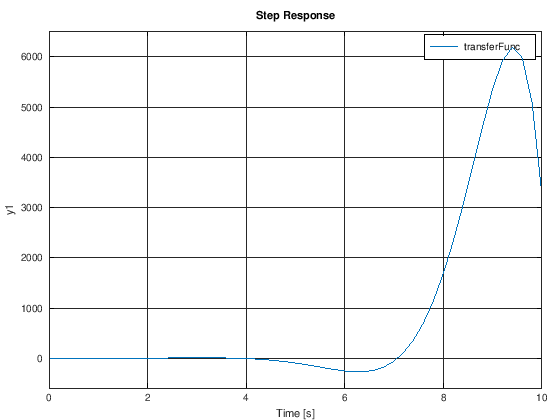

In [36]:
pkg load control
s = tf('s');
% Función transferencia
transferFunc = 1/(s^2-2*s+2);
% Gráfica de respuesta al escalón
step (transferFunc,10)